<a href="https://colab.research.google.com/github/rafaeljosem/MNA-ProyectoIntegrador_EQ10/blob/main/Avance-2/Avance2_Equipo10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

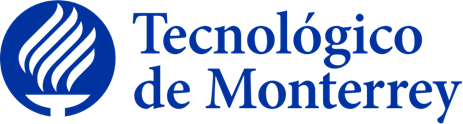

# **Maestría en Inteligencia Artificial Aplicada**
## **Curso: Proyecto Integrador**

### Dra. Grettel Barceló Alonso
### Dr. Luis Eduardo Falcón Morales
### Mtra. Verónica Sandra Guzmán de Valle

### Domingo 12 de mayo de 2024

## **Nombres y matrículas de los integrantes del Equipo 10:**

* Fernando Maytorena Espinosa de los Monteros | A01110946
* Jonathan Garza Bennet | A01793038
* Rafael José Mateo Comprés | A01793054

# **Feature Engineering**
### CAPSTONE PROJECT - MNA

Google Drive is mounted to load all 304 Mexican Federal Law Documents

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Necessary instances for further processing the text data files

In [ ]:
import os
import pandas as pd

# **Dataset file extraction, classification and compilation into a single dictionary for easier handling**

In [ ]:
#Main directory path
directory_path = '/content/drive/MyDrive/MNA/Proyecto Integrador/Data/MexicanLaws_PrePro_DataSet'

#List all directories in main path
directory_files = os.listdir(directory_path)

#Empty dictionary to append information from documents
DataSet_Dict = {"Document":[], "Available Text Files":[], "Available Clean Text Files":[], "Number of Empty Text Files Found":[],
                "Number of Empty Text Files Found":[], "Number of Empty Clean Text Files Found":[], "Number of Copied Text Files":[],
                "File Name":[], "Text":[]}

#Loop for checking all directories for files
for directory in directory_files:

    #Avoid non-directory names
    if not('NotFoundError' in directory) and not('.txt' in directory):

      #List all available files in current directory
      files_in_directory = os.listdir(directory_path+'/'+directory)

      #List to append all text file names
      available_text_files =[]

      #Append document name
      DataSet_Dict["Document"].append(directory)

      #Loop to copy all text files to main directory
      for file in files_in_directory:

          #Make a list of all available text files Only copy text files
          if '.txt' in file and not('New Text Document' in file):

            available_text_files.append(file)

      #List to append all clean text file names
      available_clean_text_files =[]

      #Counters
      number_of_empty_text_files = 0
      number_of_empty_clean_text_files = 0
      number_of_copied_text_files = 0
      text_file_is_empty = False

      for text_file in available_text_files:

          #If there is a clean text file, append it
          if 'limpio.txt' in text_file:

            available_clean_text_files.append(text_file)

          else:

            text_file_size = os.path.getsize(directory_path+'/'+directory+'/'+text_file)

            if text_file_size == 0:
              number_of_empty_text_files += 1



      #print('Number of text files found in '+directory+':'+str(len(available_text_files)))
      #print('Number of clean text files found in '+directory+':'+str(len(available_clean_text_files)))

      #Append document available text files and available clean text files
      DataSet_Dict["Available Text Files"].append(len(available_text_files))
      DataSet_Dict["Available Clean Text Files"].append(len(available_clean_text_files))

      #If clean files are available, copy only clean text files
      if len(available_clean_text_files) > 0:

        #Empty clean flag
        clean_text_file_is_empty = False

        for clean_text_file in available_clean_text_files:

          file_size = os.path.getsize(directory_path+'/'+directory+'/'+clean_text_file)

          # if file size is not 0, copy it
          if not(file_size == 0):
            #shutil.copy2(directory_path+'/'+directory+'/'+clean_text_file, directory_path+'/'+clean_text_file)

            #Append document available text files and available clean text files
            DataSet_Dict["File Name"].append(clean_text_file)

            try:

              #Open current file in read mode
              with open(directory_path+'/'+directory+'/'+clean_text_file) as f:
                text = f.read()

                #Append all text in a single dictionary key
                DataSet_Dict["Text"].append(text)

            except UnicodeDecodeError:

              #Open current file in read mode
              with open(directory_path+'/'+directory+'/'+clean_text_file, encoding='latin_1') as f:
                text = f.read()

                #Append all text in a single dictionary key
                DataSet_Dict["Text"].append(text)

            number_of_copied_text_files += 1

          else:

            number_of_empty_clean_text_files += 1
            number_of_empty_text_files += 1
            clean_text_file_is_empty = True

      #If no clean files available, or they were empty copy text files
      if len(available_clean_text_files) == 0 or clean_text_file_is_empty:

        for text_file in available_text_files:

          text_file_size = os.path.getsize(directory_path+'/'+directory+'/'+text_file)

          # if file size is not 0, copy it
          if not(text_file_size == 0):
            #shutil.copy2(directory_path+'/'+directory+'/'+text_file, directory_path+'/'+text_file)

            #Append document available text files and available clean text files
            DataSet_Dict["File Name"].append(text_file)

            try:

              #Open current file in read mode
              with open(directory_path+'/'+directory+'/'+text_file) as f:
                text = f.read()

                #Append all text in a single dictionary key
                DataSet_Dict["Text"].append(text)

            except UnicodeDecodeError:

              #Open current file in read mode
              with open(directory_path+'/'+directory+'/'+text_file, encoding='latin_1') as f:
                text = f.read()

                #Append all text in a single dictionary key
                DataSet_Dict["Text"].append(text)


            number_of_copied_text_files += 1

      #print('Number of empty text files found in '+directory+':'+str(number_of_empty_text_files))
      #print('Number of empty clean text files found in '+directory+':'+str(number_of_empty_clean_text_files))
      #print('Number of copied text files from '+directory+':'+str(number_of_copied_text_files)+'\n')

      #Append all found file metrics
      DataSet_Dict["Number of Empty Text Files Found"].append(number_of_empty_text_files)
      DataSet_Dict["Number of Empty Clean Text Files Found"].append(number_of_empty_clean_text_files)
      DataSet_Dict["Number of Copied Text Files"].append(number_of_copied_text_files)

# **Transform into Pandas Dataframe**

In [ ]:
#Import Dictionary to Pandas Data Frame
DataSet_Pandas = pd.DataFrame(DataSet_Dict, index = DataSet_Dict["Document"])

#Drop a column
DataSet_Pandas.drop(columns=['Document'], inplace=True)

#View Header
DataSet_Pandas.head()

,Available Text Files,Available Clean Text Files,Number of Empty Text Files Found,Number of Empty Clean Text Files Found,Number of Copied Text Files,File Name,Text
CÓDIGO CIVIL FEDERAL,1,0,0,0,1,CÓDIGO CIVIL FEDERAL_texto.txt,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...
CÓDIGO DE COMERCIO,1,0,0,0,1,CÓDIGO DE COMERCIO_texto.txt,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...
CÓDIGO DE JUSTICIA MILITAR,1,0,0,0,1,CÓDIGO DE JUSTICIA MILITAR_texto.txt,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...
CÓDIGO FEDERAL DE PROCEDIMIENTOS CIVILES,3,1,0,0,1,6.pdf.txtlimpio.txt,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...
CÓDIGO FISCAL DE LA FEDERACIÓN,3,1,0,0,1,8_241218.pdf.txtlimpio.txt,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...


Total files pre-processed

In [ ]:
len(DataSet_Pandas)

304

# **Full Dataset Tokenization Process**

In [ ]:
# Import NLP instances
import nltk
from nltk.corpus import stopwords
import re

In [ ]:
#Get spanish stopwords
nltk.download('stopwords')    # para tener acceso a "stopwords" en varios idioma
mystopwords = stopwords.words('spanish')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#Function that tokenizes, removes stopwords and other not wanted tokens
def clean_tok(doc):
  #Empty list for tokens
  tokens = []

  #SSubtitute all words that are not an alphabetic characters including accents with a blank space
  words = re.sub(r'[^a-zA-ZáéíóúüñÁÉÍÓÚÜÑ]', ' ', doc)

  #Split and lowercase all words
  words = words.lower().split()

  #Assign a copy of the words list
  tokens = words.copy()

  #Loop to remove undesired wordCiclo para revisar todas las palabras del comentario
  for word in words:

    #Si la palabra actual es una stopword o si su longitud es menor a dos, se elimina de la lista de tokens.
    if word in mystopwords or len(word) < 2:

      tokens.remove(word)

  return tokens

In [ ]:
# Tokenization and cleaning process
DataSet_Pandas['Tokens'] = [clean_tok(x) for x in DataSet_Pandas['Text']]

In [ ]:
DataSet_Pandas.head()

,Available Text Files,Available Clean Text Files,Number of Empty Text Files Found,Number of Empty Clean Text Files Found,Number of Copied Text Files,File Name,Text,Tokens
CÓDIGO CIVIL FEDERAL,1,0,0,0,1,CÓDIGO CIVIL FEDERAL_texto.txt,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"[código, civil, federal, código, civil, federa..."
CÓDIGO DE COMERCIO,1,0,0,0,1,CÓDIGO DE COMERCIO_texto.txt,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"[código, comercio, código, comercio, nuevo, có..."
CÓDIGO DE JUSTICIA MILITAR,1,0,0,0,1,CÓDIGO DE JUSTICIA MILITAR_texto.txt,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"[código, justicia, militar, código, justicia, ..."
CÓDIGO FEDERAL DE PROCEDIMIENTOS CIVILES,3,1,0,0,1,6.pdf.txtlimpio.txt,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"[código, federal, procedimientos, civiles, cód..."
CÓDIGO FISCAL DE LA FEDERACIÓN,3,1,0,0,1,8_241218.pdf.txtlimpio.txt,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"[código, fiscal, federación, código, fiscal, f..."


On the first step, all files with a size higher than 0 were classified as not empty. However, some files even with having a size higher than 0 are truly empty (probably corrupted). The tokenization process allow us to find if valid tokens were found. Any files that passed the original criteria for not being considered empty, but displaying no tokens will now be considered empty and removed from the dataframe.

In [ ]:
Clean_DataSet_Pandas = DataSet_Pandas[DataSet_Pandas['Tokens'].str.len() != 0].copy()

print('Number of total documents in dataframe: '+str(len(DataSet_Pandas)))
print('Number of not empty documents in dataframe: '+str(len(Clean_DataSet_Pandas)))

Number of total documents in dataframe: 304
Number of not empty documents in dataframe: 230


In [ ]:
Clean_DataSet_Pandas.head()

,Available Text Files,Available Clean Text Files,Number of Empty Text Files Found,Number of Empty Clean Text Files Found,Number of Copied Text Files,File Name,Text,Tokens
CÓDIGO CIVIL FEDERAL,1,0,0,0,1,CÓDIGO CIVIL FEDERAL_texto.txt,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"[código, civil, federal, código, civil, federa..."
CÓDIGO DE COMERCIO,1,0,0,0,1,CÓDIGO DE COMERCIO_texto.txt,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"[código, comercio, código, comercio, nuevo, có..."
CÓDIGO DE JUSTICIA MILITAR,1,0,0,0,1,CÓDIGO DE JUSTICIA MILITAR_texto.txt,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"[código, justicia, militar, código, justicia, ..."
CÓDIGO FEDERAL DE PROCEDIMIENTOS CIVILES,3,1,0,0,1,6.pdf.txtlimpio.txt,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"[código, federal, procedimientos, civiles, cód..."
CÓDIGO FISCAL DE LA FEDERACIÓN,3,1,0,0,1,8_241218.pdf.txtlimpio.txt,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"[código, fiscal, federación, código, fiscal, f..."
...,...,...,...,...,...,...,...,...
LEY NACIONAL DE EJECUCIÓN PENAL,2,1,0,0,1,LNEP_090518.pdf.txtlimpio.txt,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"[ley, nacional, ejecución, penal, ley, naciona..."
LEY NACIONAL DE MECANISMOS ALTERNATIVOS DE SOLUCIÓN DE,2,1,0,0,1,LNMASCMP_291214.pdf.txtlimpio.txt,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"[ley, nacional, mecanismos, alternativos, solu..."
LEY NACIONAL DEL SISTEMA INTEGRAL DE JUSTICIA PENAL PARA ADOLESCENTES,3,1,0,0,1,LNSIJPA.pdf.txtlimpio.txt,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"[ley, nacional, sistema, integral, justicia, p..."
LEY ORGÁNICA DE LA ADMINISTRACIÓN PÚBLICA FEDERAL,2,1,0,0,1,153_301118.pdf.txtlimpio.txt,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"[ley, orgánica, administración, pública, feder..."


A total of 74 files were needed to be removed due to not having any valid text on them. We will need to determine later during the project if the missing files are going to be obtained from other sources than the original database. This will involve additional complexity to the project, since original file format is PDF, so the text will need to be extracted from if and then subject to all of the last pre-processiong so they can be included on this compiled dataset.

Another alternative is to continue the project with the current cleaned dataset compilation, to allow more time on model determination and training. Including the missing documents can be part of a future project revision.

# **Exporting the compiled cleaned pre-processed dataframe to CSV format for future usage during the project**

In [ ]:
Clean_DataSet_Pandas.to_csv(directory_path+'MexicanLaws_Clean_Compiled_PrePro_DataSet.csv')

# **References:**

Martinez-Seis, B., Pichardo-Lagunas, O., Koff, H., Equihua, M., Perez-Maqueo, O., & Hernández-Huerta, A. (2022, July 6). Unified, labeled, and semi-structured database of pre-processed Mexican laws. MDPI. https://www.mdpi.com/2306-5729/7/7/91

Liu, Y. (2024, March 22). How to generate instruction datasets from any documents for LLM Fine-Tuning. Medium. https://towardsdatascience.com/how-to-generate-instruction-datasets-from-any-documents-for-llm-fine-tuning-abb319a05d91

Lane, K. (2021, October 31). Tokenization with NLTK. Medium. https://medium.com/@kelsklane/tokenization-with-nltk-52cd7b88c7d

H., B. (2020, March 22). How to export pandas DataFrame to CSV. Medium. https://towardsdatascience.com/how-to-export-pandas-dataframe-to-csv-2038e43d9c03
